# YouTube API

In [ ]:
!pip install youtube_transcript_api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import JSONFormatter

In [ ]:
def download_transcript(video_id):
  ''' Downloads transcripts of the YouTube video ID received and saves them in a JSON file '''

  try:
    transcript = YouTubeTranscriptApi.get_transcript(video_id)

    full_transcription = " ".join([item['text'] for item in transcript]) # Concat all the text insead of sentences and times, we don't need the time metadata

    print(f"[SUCCESS] Transcript of video {video_id} downloaded successfully")
    return full_transcription

  except ValueError as e:
    print(f"[ERROR] Unable to fetch transcript for URL: {video_id}")
    print(f"Reaseon: {e}")


def extract_video_id(url):
  ''' Extracts the YouTube ID from a URL '''
  id = ''
  if 'v=' in url:
    id = url.split('v=')[1].split('&')[0]
  elif 'youtu.be/' in url:
    id = url.split('youtu.be/')[1]
  else:
    id = ValueError('Invalid URL')
  return id

def get_youtube_url(youtube_url):
  ''' Asks for the youtube URL video '''

  try:
    video_id = extract_video_id(youtube_url)
    print(f'The video ID is: {video_id}')
    transcription = download_transcript(video_id)
    print(transcription)

    if transcription:
      print("\nTranscription:")
      print(transcription)
      return transcription

    else:
      print("Transcription not found.")


  except ValueError as e:
    print(e)
  return youtube_url



In [ ]:
transcription = get_youtube_url()

Enter the YouTube video URL: https://www.youtube.com/watch?v=TOjgfLqPzCQ
The video ID is: TOjgfLqPzCQ
[SUCCESS] Transcript of video TOjgfLqPzCQ downloaded successfully
even if he steals the chaos storm it works well with the Real Steal the Nar ultimate works well with Real Steal the silus or steal the scarner ultimate with silus uh and impale with the real Ultimate I feel like it empowers bdd in a really cool way will also gives duck a pretty stable laning phase was more of a niche support looking really good right now um grasp by the way for Faker and Doran as we have engage oh crash down does come in but that is a heroic charge and a first blood for smash way not sure about that one maybe he should have listened to Casting um as that is not going very well and already smash off to a pretty good start grabs himself a feet of strength uh prior to 3 minutes bdd or at least make sure that bdd can get something done as owner is going to have his back denied this could be a big deal as Vau

In [ ]:
len(transcription)

30209

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/LLM/Practica/transcription.txt"

with open(file_path, "w") as file:
  file.write(transcription)

# OpenAI API

In [ ]:
import getpass
import openai

In [ ]:
openai.api_key = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [ ]:
prompt ="""
    You are a professional League of Legends analyst.
    You have just received the transcript of a professional match.
    Your task is to analyze it and generate a detailed summary that is both understandable and useful for players of all skill levels.

    In your analysis, make sure to include:

    1.Champion and Composition Analysis:
    - Explain the champion picks (champ select) of both teams:
    - Why were these champions chosen specifically?
    - What roles and priorities does each pick address (AP, AD, frontline, engage, peel, etc.)?
    - Are there any notable strategic picks or counterpicks?
    - How does each team's composition fit into the current meta?
    - What win conditions does each team pursue based on their champions?

    2.Key Moments of the Match:
    - Decisive teamfights.
    - Major objectives secured (dragons, Baron, turrets, etc.).
    - Rotations or plays that marked a turning point.

    3.Strategies:
    - What strategies were employed by both teams?
    - Which ones worked well and why?
    - Which strategic decisions failed, and how did they impact the outcome?

    4.Well-Executed Plays and Areas for Improvement:
    - Highlight plays, mechanics, or decisions that were executed well.
    - Point out mistakes made, both at an individual and team level.

    5.Meta and Tempo Details:
    - Team compositions: How do they align with the current meta?
    - Game tempo: Which team controlled the pace, and how did they achieve it?
    - Strategic adaptations made as the game progressed.

    6.Practical Tips:
    - Explain what an average player can learn from this match.
    - Provide tips to help improve gameplay based on observations from the match.

    Use clear, professional, and detailed language, ensuring that even casual players can follow the analysis while offering enough depth for advanced players to find value as well.

"""

In [ ]:
def get_completion(prompt, trasncription, model="gpt-4o-mini", temperature = 0):
    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": transcription}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )
    return response.choices[0].message.content

## GPT-4o-mini

In [ ]:
response_4o_mini = get_completion(prompt, transcription)
print(response_4o_mini)

### Match Analysis Summary

#### 1. Champion and Composition Analysis:
- **Team Compositions:**
  - **T1:** T1's composition featured champions like **Ari**, **Ziggs**, **Nautilus**, **Gnar**, and **Lee Sin**. This composition provided a balanced mix of AP and AD damage, with strong engage and poke potential. The presence of **Ari** and **Ziggs** allowed for significant burst damage, while **Nautilus** offered crowd control and tankiness.
  - **KT Rolster:** KT opted for **Swain**, **Jax**, **Rumble**, **Nautilus**, and **Zyra**. This composition leaned heavily on sustained damage and teamfight presence, with **Swain** and **Rumble** providing area control and damage over time. **Jax** served as a late-game scaling threat, while **Nautilus** and **Zyra** offered engage and zoning capabilities.

- **Strategic Picks and Counterpicks:**
  - T1's **Ari** was a strong pick against KT's **Swain**, as she could dodge his abilities and burst him down before he could heal significantly. 
  - KT

In [ ]:
file_path = "/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/LLM/Practica/response_4o_mini.txt"

with open(file_path, "w") as file:
  file.write(response_4o_mini)

## GPT-4o

In [ ]:
response_4o = get_completion(prompt, transcription, model='gpt-4o')
print(response_4o)

### Champion and Composition Analysis:

**Team 1:**
- **Sylas:** Chosen for his ability to steal powerful ultimates, providing flexibility and counterplay against the enemy team. His role is primarily AP with engage potential.
- **Vi:** Offers strong engage and lockdown with her ultimate, addressing the need for a frontline and initiation.
- **Gnar:** Provides a mix of frontline and engage with his Mega Gnar form, while also offering split-push potential.
- **Ezreal:** A safe AD carry with poke and mobility, fitting well into a composition that can kite and disengage.
- **Rakan:** Offers engage and peel, synergizing with the team's need for initiation and protection for Ezreal.

**Team 2:**
- **Swain:** Acts as a durable AP threat with sustain, fitting into a teamfight-oriented composition.
- **Rumble:** Provides AP damage and zone control with his ultimate, useful for objective fights.
- **Jax:** A strong split-pusher and duelist, offering AD damage and side lane pressure.
- **Varus:*

In [ ]:
file_path = "/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/LLM/Practica/response_4o.txt"

with open(file_path, "w") as file:
  file.write(response_4o)

# Gradio

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def model_function(video_url):
    transcription = get_youtube_url(video_url)
    if transcription:
      response_4o = get_completion(prompt, transcription, model='gpt-4o')
      return response_4o
    else:
      return "Transcription not found"

iface = gr.Interface(
    fn=model_function,
    inputs=gr.Textbox(label="Introduce the youtube video url"),
    outputs=gr.Markdown(response_4o))


iface.launch(share=True, debug=True)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://acf8c9dab7e025d247.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://acf8c9dab7e025d247.gradio.live


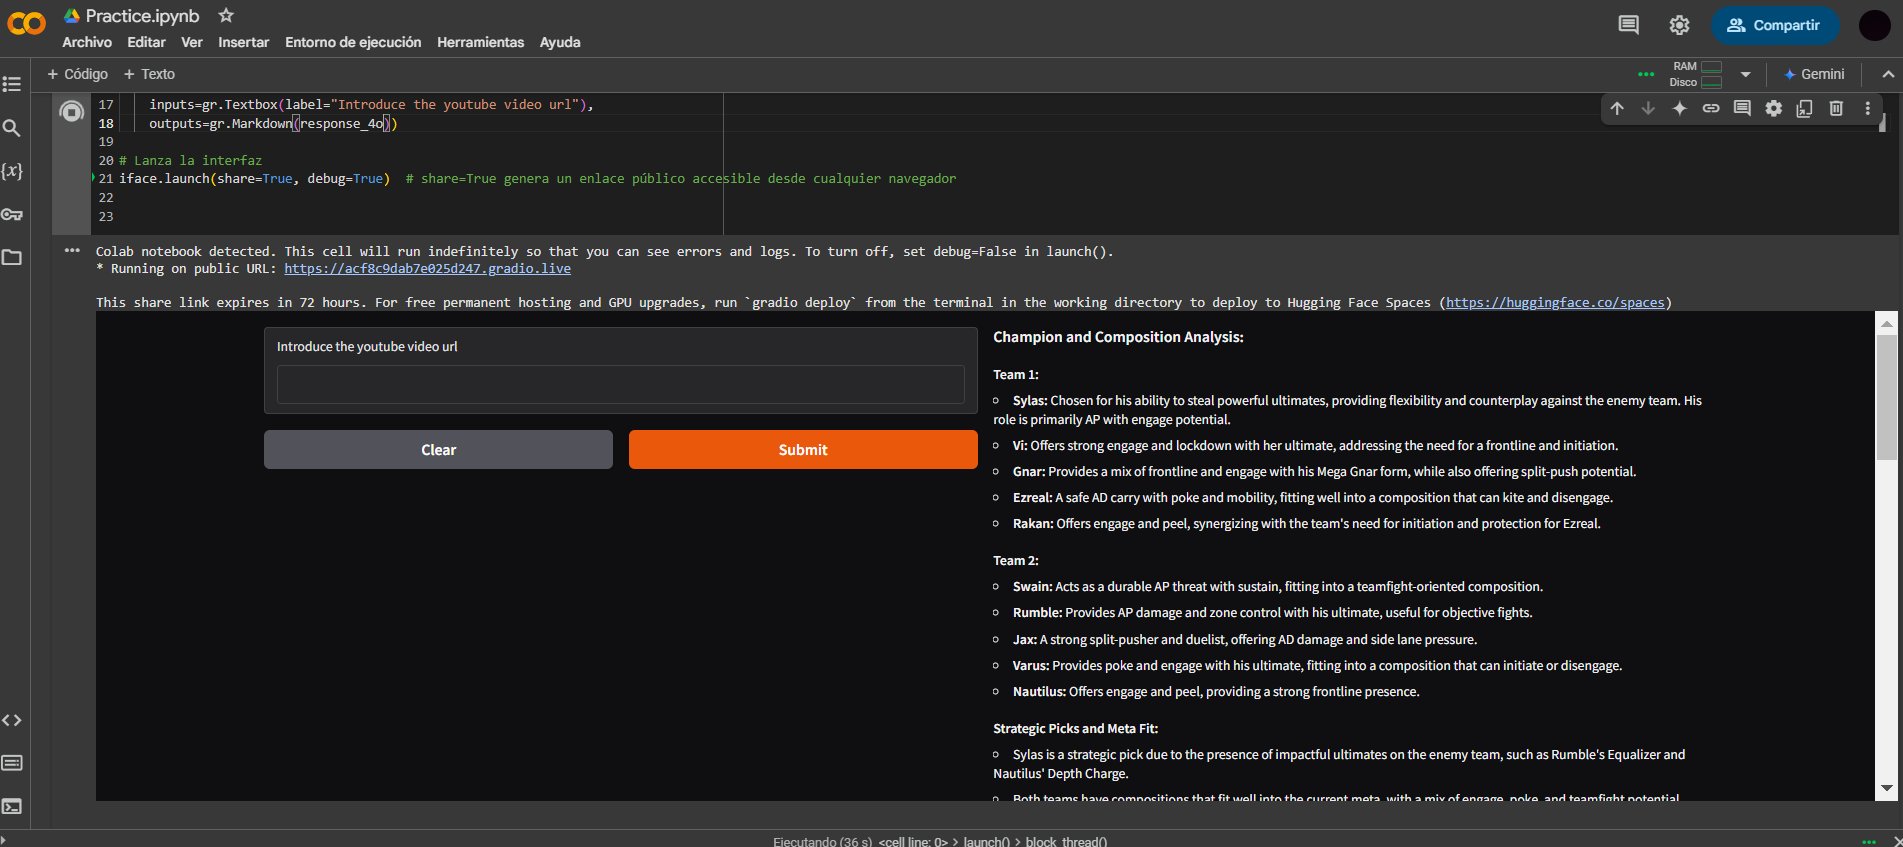